# Notebook for data visualization of HAM10000 dataset 


### Papers:
* https://arxiv.org/pdf/1803.10417.pdf
* https://arxiv.org/pdf/1902.03368.pdf

### Source
* https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T
* notebook : https://github.com/marmal88/computer_vision_toolkit/blob/main/notebooks/1.1_basic_EDA.ipynb
  
###  Challenge ISIC
* https://challenge.isic-archive.com/data/#2018 
* https://challenge.isic-archive.com/landing/2018/ 


##  Import packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# To plot on jupyter notebook (depends on browser)
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

import plotly.express as px


/var/folders/f_/5k17103s6dx_p4d2kxxkf3p40000gn/T/ipykernel_4187/3809992572.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read metadata csv file

In [2]:
main_dir = "dataset_HAM10000"
csv_path = os.path.join(main_dir, "HAM10000_metadata.csv")
df = pd.read_csv(csv_path)
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [4]:
# lesion_id
print(f"There are {len(df.lesion_id.unique())} different lesion_id")

# diagnosis dx
print(f"There are {len(df.dx.unique())} different diagnoses: {np.sort(df.dx.unique())}")

# diagnosis method
print(f"There are {len(df.dx_type.unique())} different methods for diagnosis: {np.sort(df.dx_type.unique())}")

# age
print(f"There are {len(df.age.unique())} differents classes for age: {np.sort(df.age.unique())}") 

# sex
print(f"There are {len(df.sex.unique())} different classes for sex: {np.sort(df.sex.unique())}") 

# localization of skin diagnosis
print(f"There are {len(df.localization.unique())} different localization: {np.sort(df.localization.unique())}")

There are 7470 different lesion_id


NameError: name 'np' is not defined

## Check of missing values

In [ ]:
df.isna().sum()

In [ ]:
print(f"There are {df.isna().age.sum()}/{len(df.isna().age)} missing values in the column - age")

In [ ]:
## Mapping the types of tumors in their scientific name for a more explicit naming
lesion_type_dict = {
    'akiec': 'Actinic keratoses',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions ',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions',
}

df['dx'] = df.dx.map(lesion_type_dict)

## Distributions of data depending on diagnosis - "dx"

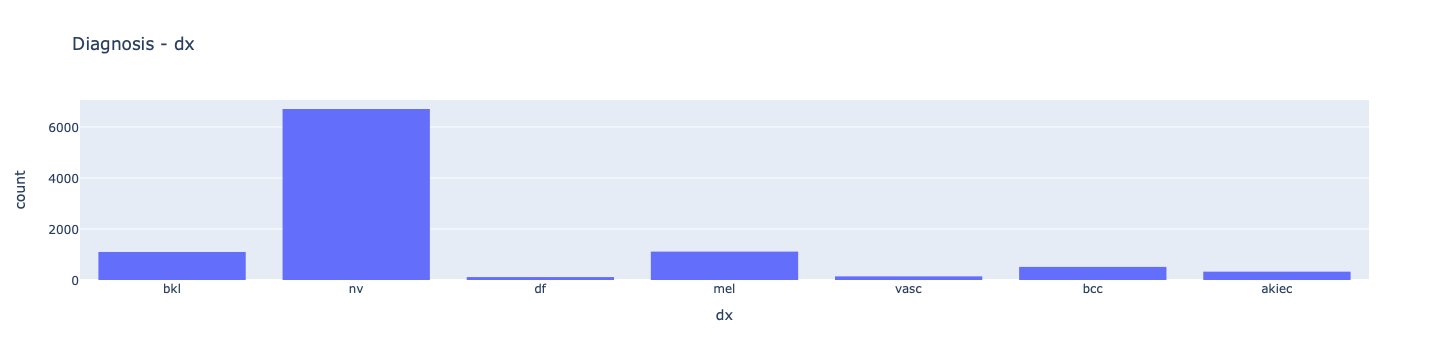

In [5]:
fig = px.histogram(df, x="dx", title="Diagnosis - dx")
fig.show()

The dataset is not well balanced in terms of "dx" as:
- there are ~6700 images of "nv": "Melanocytic nevi"
- only ~100 images for these 2classes:
    - "df": "dermatofibroma"
    - "vasc": "vascular lesions"


## Distributions of data depending on method of diagnosis - "dx_type"

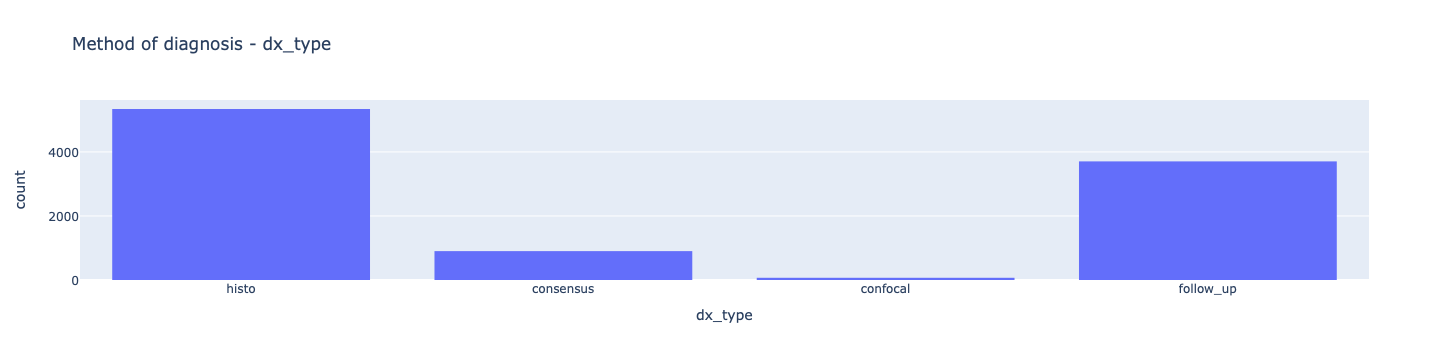

In [6]:
fig = px.histogram(df, x="dx_type", title="Method of diagnosis - dx_type")
fig.show()

The dataset is not well balanced depending on "dx_type"
- over representation of class: "histo"
- under representation of class: "confocal"


## Distributions of data depending on age

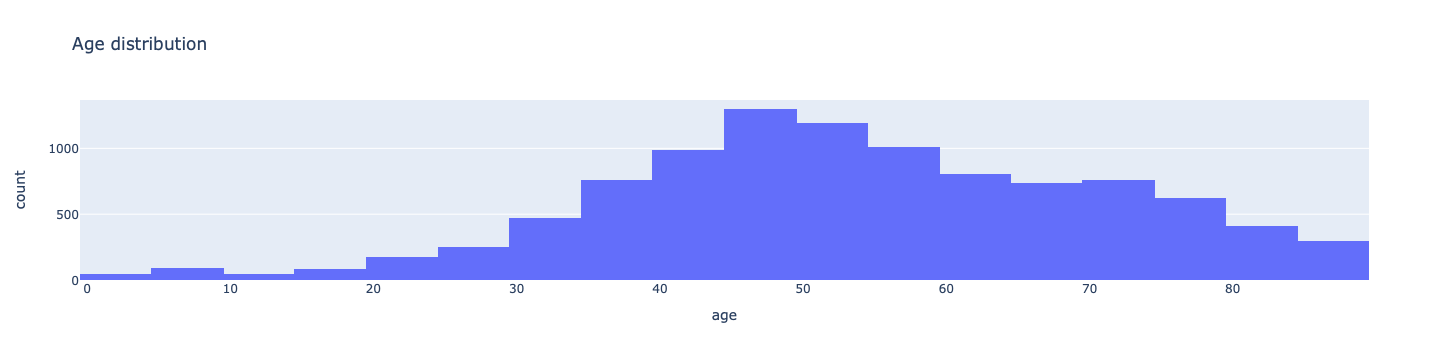

In [7]:
fig = px.histogram(df, x="age", title="Age distribution")
fig.show()

The dataset is not well balanced depending on "age"
- most of the data are collected for people around 45-55 years old
- there are less data for your people
- it seems normal that there are more medical diagnoses for older people


## Distributions of data depending on sex

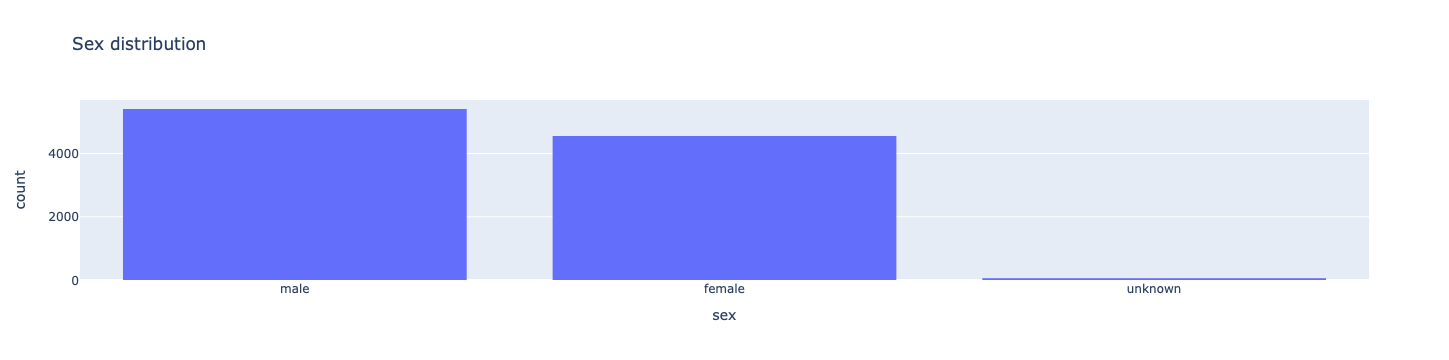

In [8]:
fig = px.histogram(df, x="sex", title="Sex distribution")
fig.show()

The dataset is relatively well balanced between the 2 mains classe: 
- "male" (~5400 values) 
- "female” (~4500 values)

There are ~57/10000 values of the class "unknown" : this could be negligeable


## Distributions of data depending on localization of diagnosis - "localization"

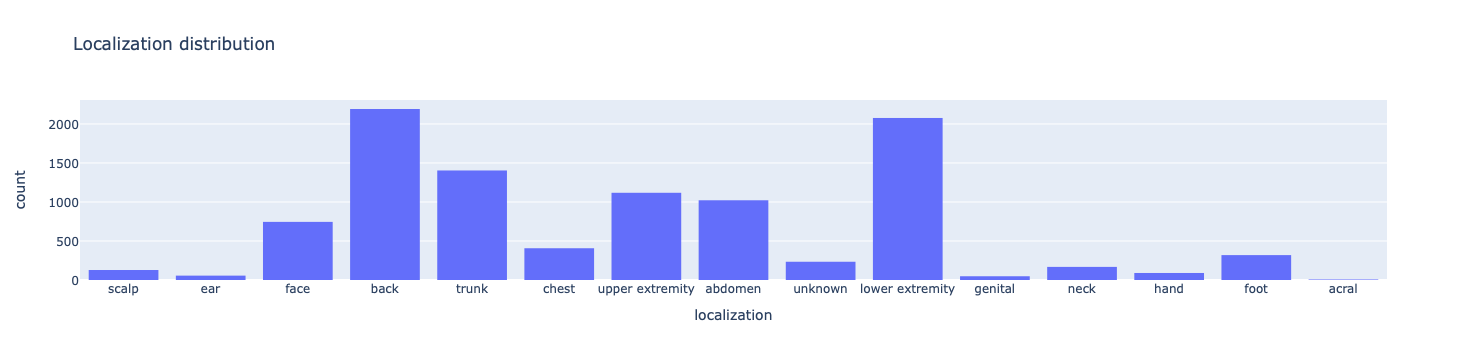

In [9]:
fig = px.histogram(df, x="localization", title="Localization distribution")
fig.show()

The dataset seems not to be balanced depending on the localizations of the diagnoses


# Correlations

## Correlations between diagnosis "dx" & methods of diagnosis "dx_type" 

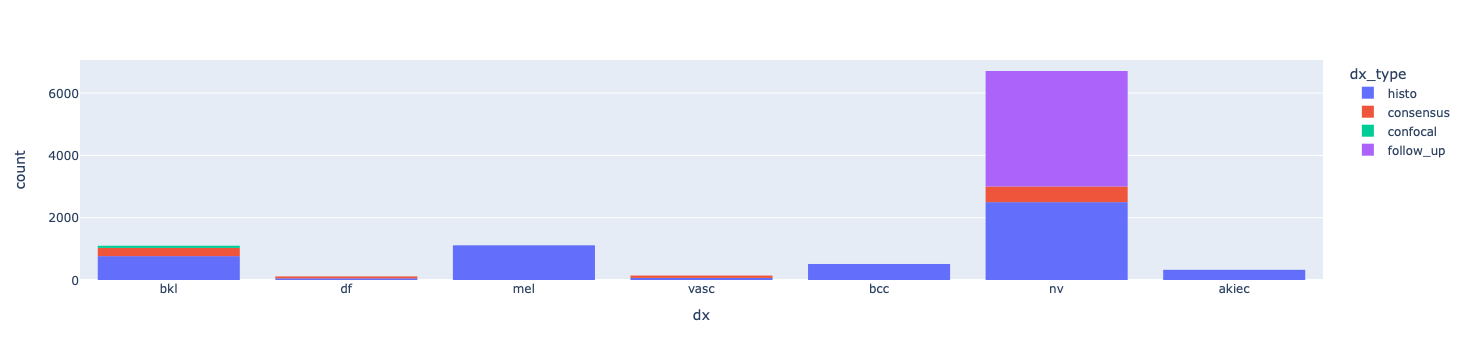

In [10]:
fig = px.histogram(df, x="dx", color="dx_type")
fig.show()

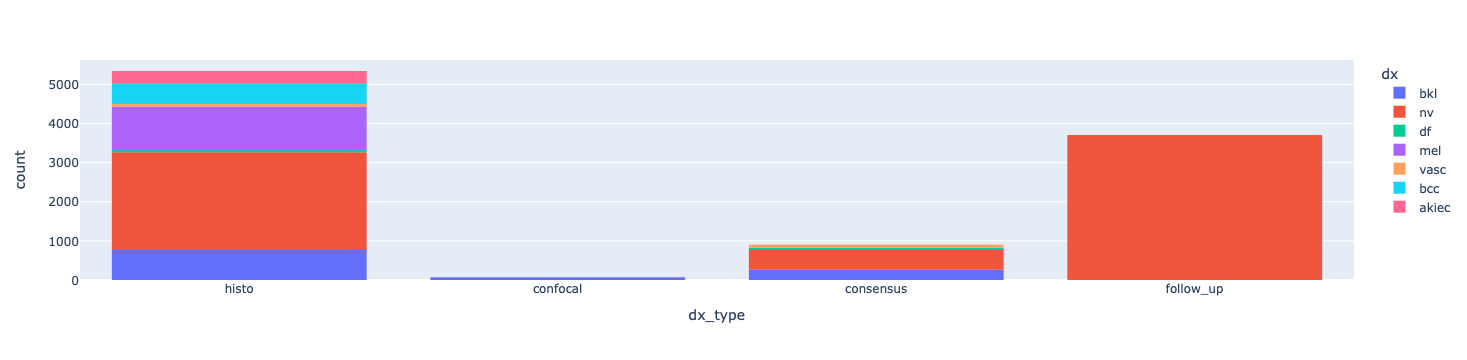

In [11]:
fig = px.histogram(df, x="dx_type", color="dx")
fig.show()

Depending on the diagnosis, the method of detection is different: 
- "dx_type"== "histo" is present for all classes of diagnoses
- "dx_type"=="follow_up" is the main method for the diagnosis "dx"=="Actiniv keratoses"


## Correlations between diagnosis "dx" & "age"

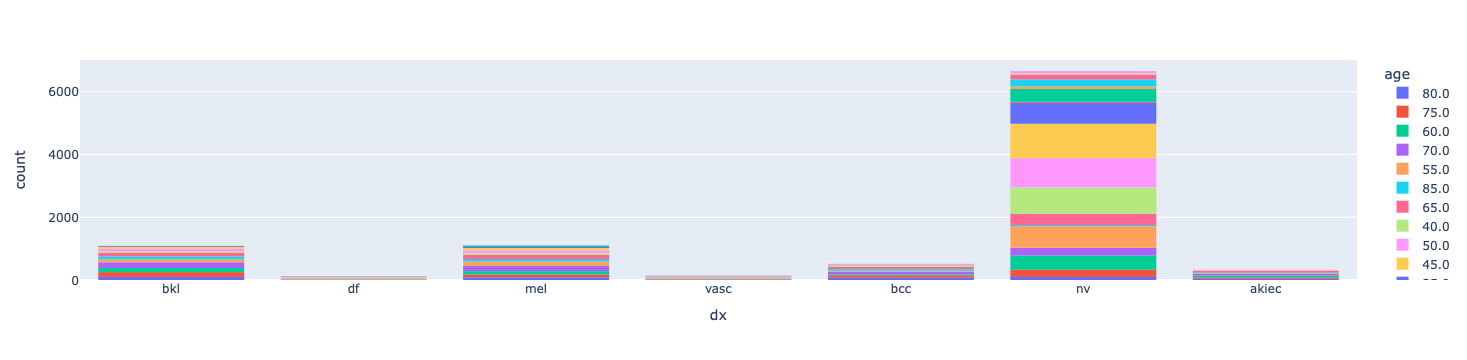

In [12]:
fig = px.histogram(df, x="dx", color="age")
fig.show()

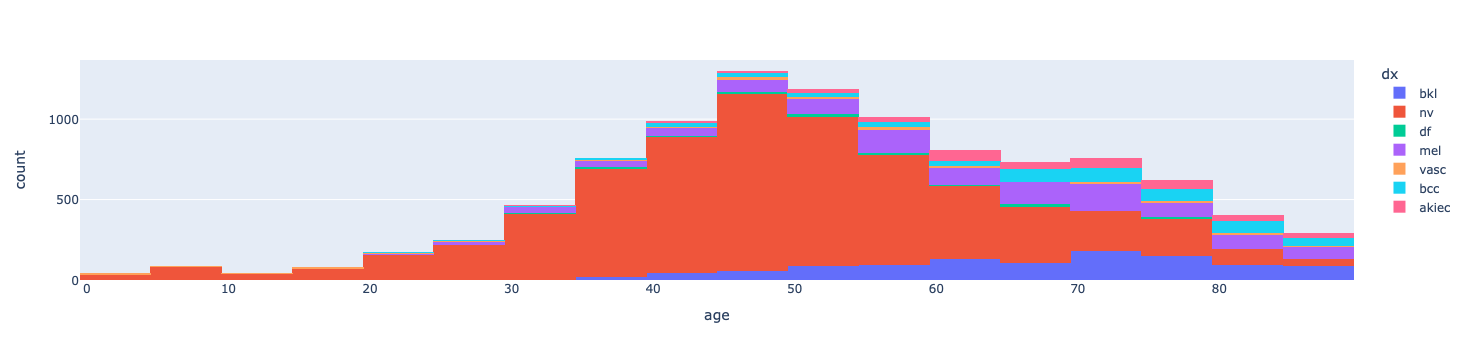

In [13]:
fig = px.histogram(df, x="age", color="dx")
fig.show()

Depending on the age of the patients, the diagnoses are different:
- for young people (0 < age < 30), the main diagnosis is "Melanocytic nevi"
- for age >= 35, "Benign keratosis-like lesions" appear
- the other diagnoses are present 

## Correlations between diagnosis "dx" & "sex"

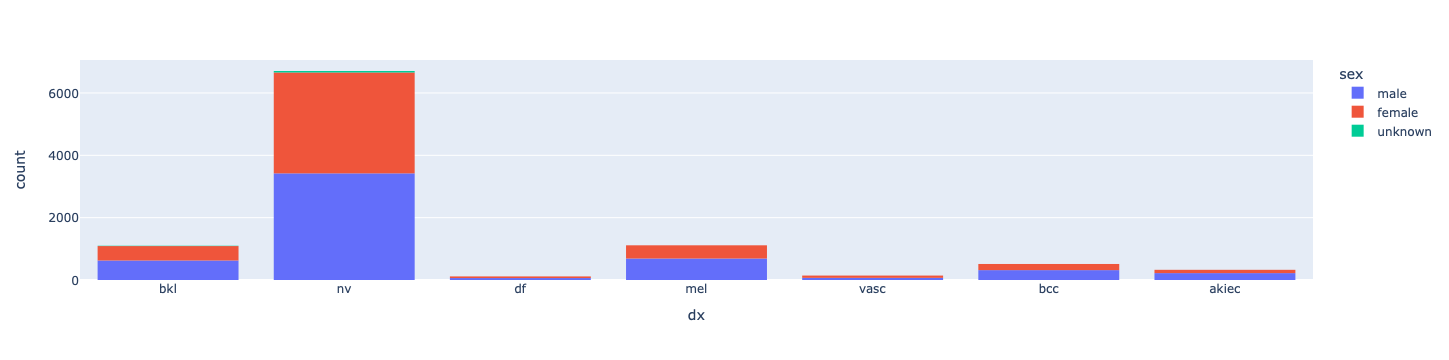

In [14]:
fig = px.histogram(df, x="dx", color="sex")
fig.show()

Each diagnosis is well balanced between "male" and "female" classes

## Correlations between diagnosis "dx" & "localization"

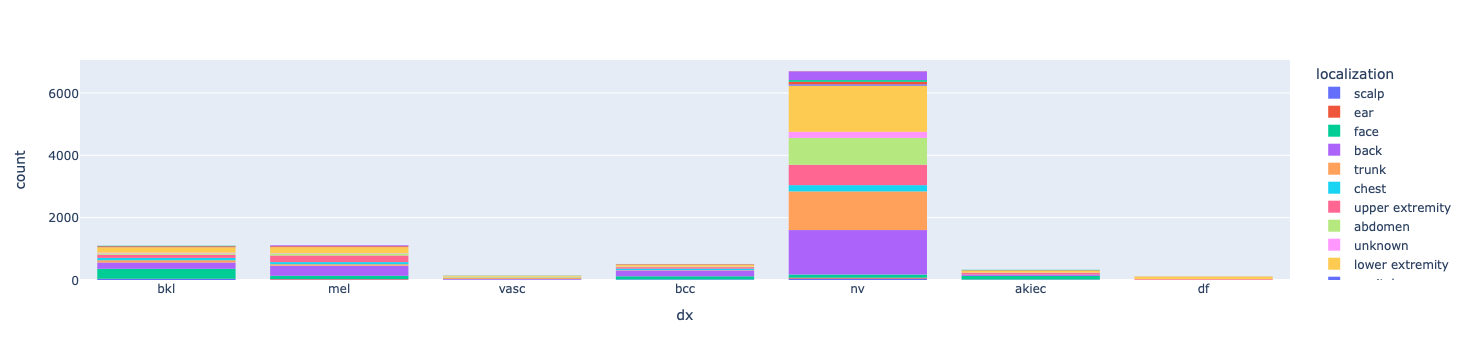

In [15]:
fig = px.histogram(df, x="dx", color="localization")
fig.show()

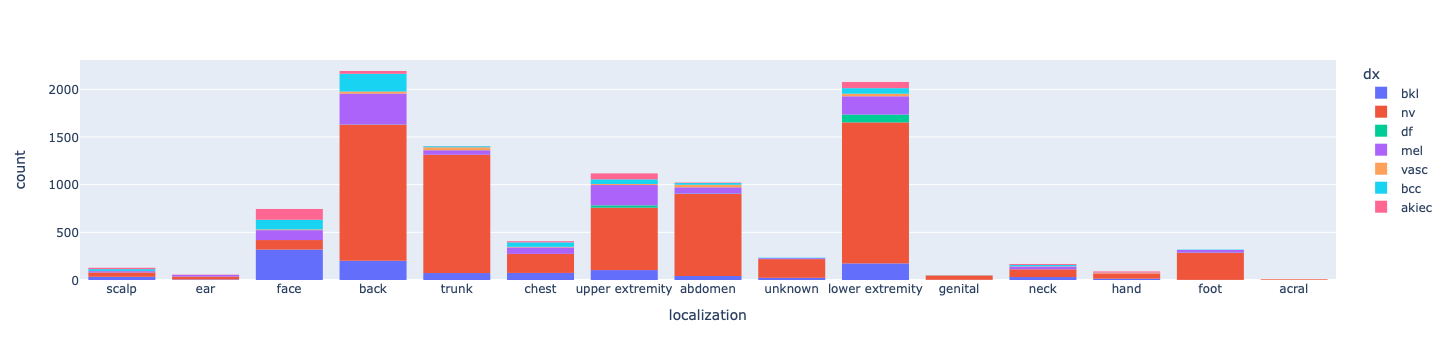

In [16]:
fig = px.histogram(df, x="localization", color="dx")
fig.show()

The different diagnoses are present on different localizations.
Maybe, we would need a medical point of view on the reality this distribution ? 

## Correlations between "age" & method of diagnosis "dx_type"

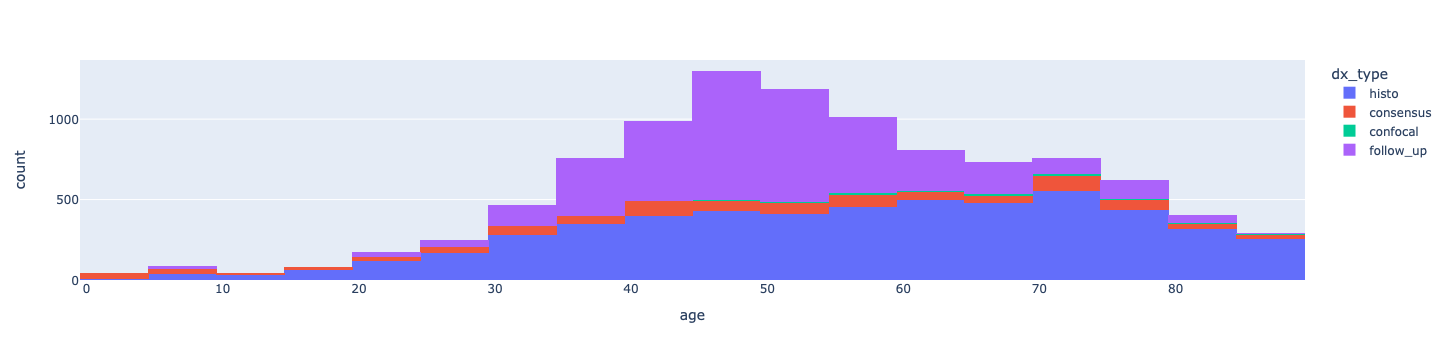

In [17]:
fig = px.histogram(df, x="age", color="dx_type")
fig.show()

- Most of the different methods of diagnosis ("histo", "consensus") are used for every class of ages. 
- "follow_up" is also mainly used for 20 <= age 
- "confocal" method is less used maybe because they seem to be more in-depth examinations ? 

## Correlations between "age" & "sex"

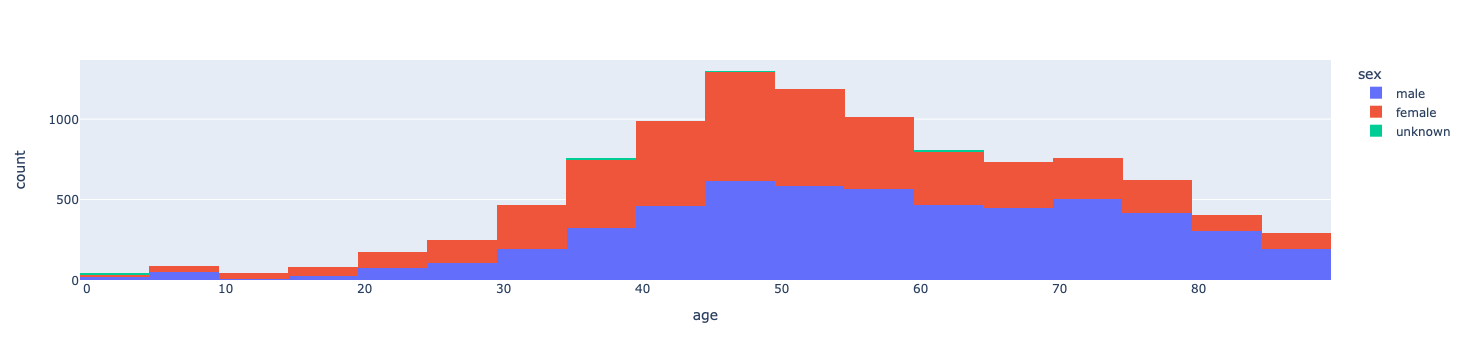

In [18]:
fig = px.histogram(df, x="age", color="sex")
fig.show()

- The dataset contains around 50-50% of "male"/"female" for each class of "age": it is a good balance

- Question from Thomas Boehler : "Is there any information about a patient ID ?"
- No -> it may be possible that several diagnoses are made on the same patient at different localization                                           

## Correlations between "age" & "localization"

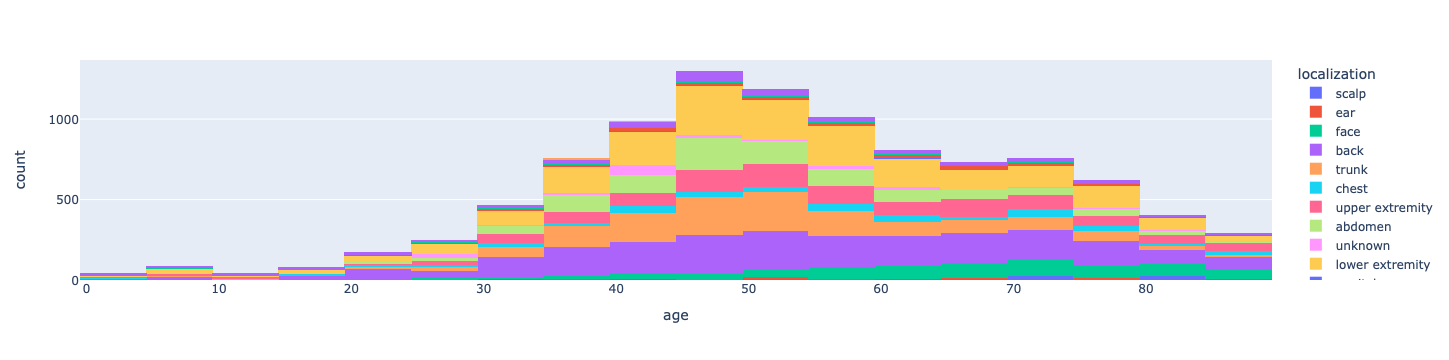

In [19]:
fig = px.histogram(df, x="age", color="localization")
fig.show()

## Correlations between "sex"  & diagnosis "dx"

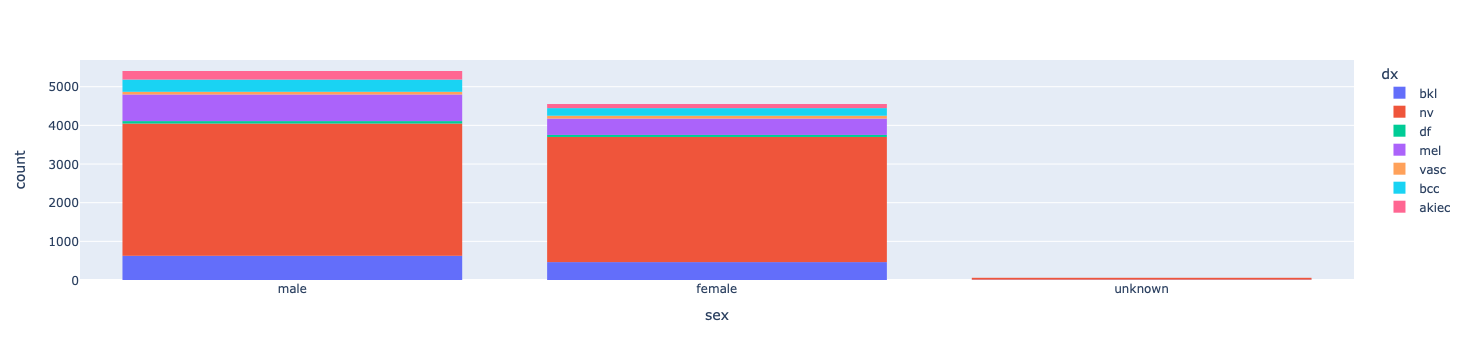

In [20]:
fig = px.histogram(df, x="sex", color="dx")
fig.show()

## Correlations between "sex"  & method of diagnosis "dx_type"

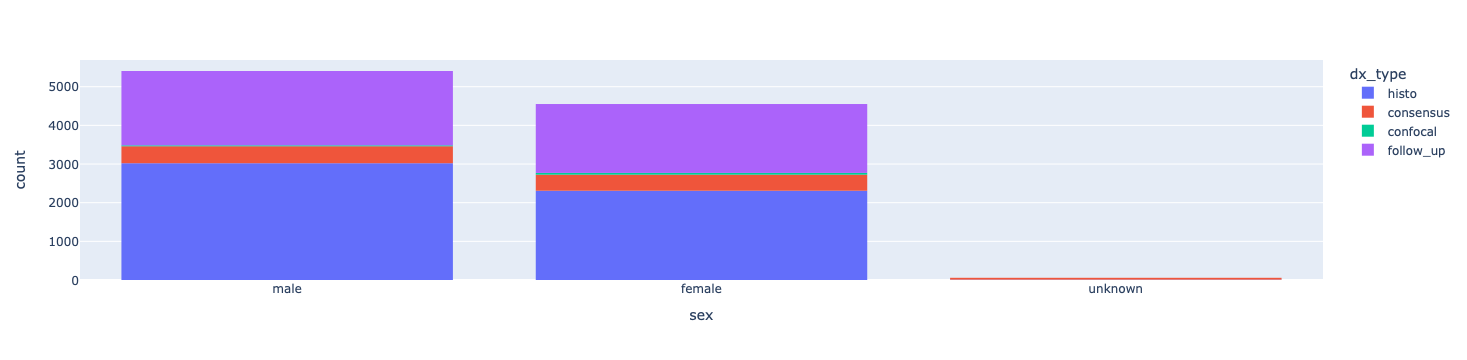

In [21]:
fig = px.histogram(df, x="sex", color="dx_type")
fig.show()

## Correlations between "sex" & "age"

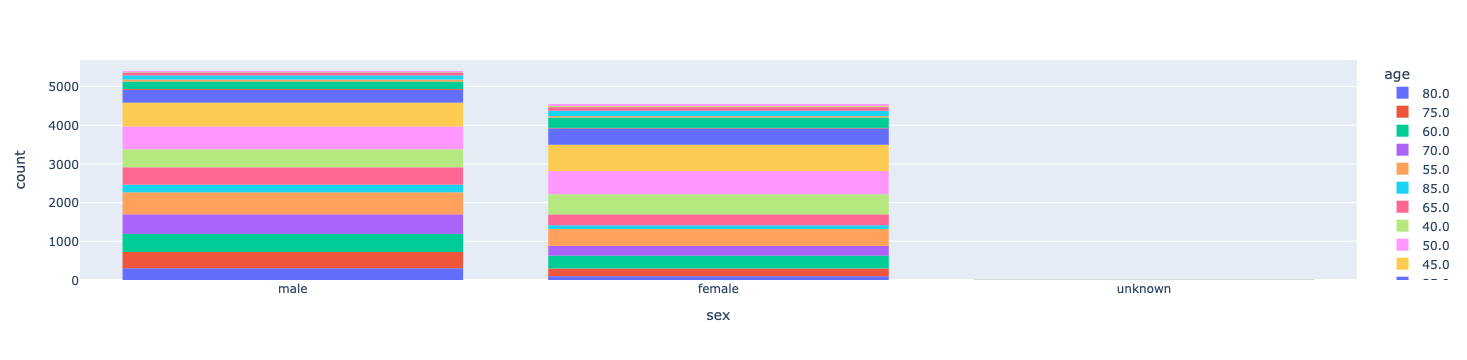

In [22]:
fig = px.histogram(df, x="sex", color="age")
fig.show()

## Correlations between "sex" & "localization"

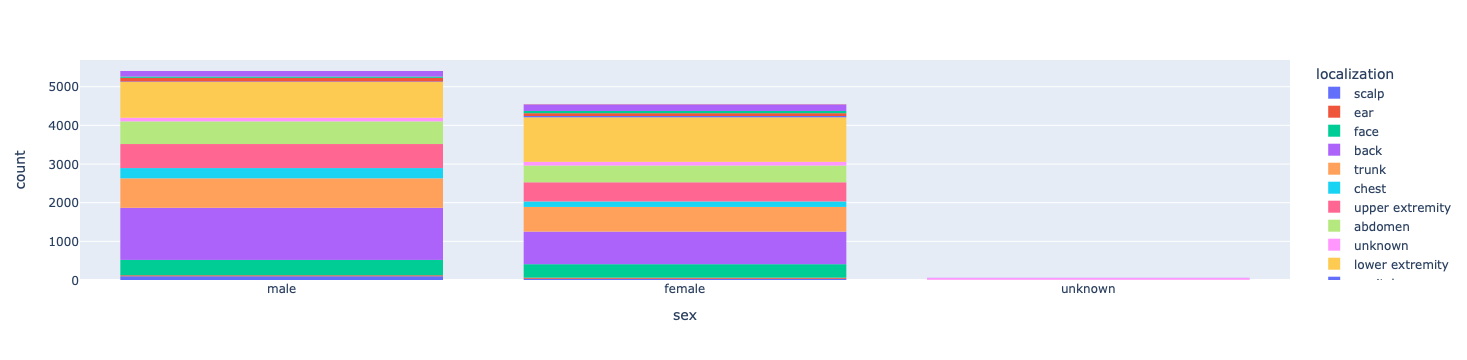

In [23]:
fig = px.histogram(df, x="sex", color="localization")
fig.show()

In [ ]:
fig = px.histogram(df, x="sex", color="dx")
fig.show()